In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [95]:
!ls ../data/raw

description.xlsx		tubes2_HeartDisease_test.csv
TBSC2-20181112T130549Z-001.zip	tubes2_HeartDisease_train.csv


### Initialize Path Constants

In [96]:
RAW_DATA_PATH = '../data/raw'

### Load CSV File

In [97]:
train_df = pd.read_csv('{}/tubes2_HeartDisease_train.csv'.format(RAW_DATA_PATH))
test_df = pd.read_csv('{}/tubes2_HeartDisease_test.csv'.format(RAW_DATA_PATH))

In [98]:
train_df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


In [99]:
test_df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


## Rename Column Names

So it's easier to read..

In [100]:
from copy import deepcopy

test_columns_replacement = {
    'Column1': 'age',
    'Column2': 'sex',
    'Column3': 'chest_pain_type',
    'Column4': 'resting_blood_pressure',
    'Column5': 'serum_cholestrol',
    'Column6': 'fasting_blood_sugar',
    'Column7': 'resting_ECG',
    'Column8': 'max_heart_rate_achieved',
    'Column9': 'excercise_induced_angina',
    'Column10': 'ST_depression',
    'Column11': 'peak_exercise_ST_segment',
    'Column12': 'num_of_major_vessels',
    'Column13': 'thal',
}

train_columns_replacement = test_columns_replacement.copy()
train_columns_replacement['Column14'] = 'heart_disease_diagnosis'

train_df = train_df.rename(columns=train_columns_replacement)

test_df = test_df.rename(columns=test_columns_replacement)

In [101]:
train_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_ECG,max_heart_rate_achieved,excercise_induced_angina,ST_depression,peak_exercise_ST_segment,num_of_major_vessels,thal,heart_disease_diagnosis
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


In [102]:
test_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_ECG,max_heart_rate_achieved,excercise_induced_angina,ST_depression,peak_exercise_ST_segment,num_of_major_vessels,thal
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


## Exploratory Data Analysis

### Check For Null Values

#### Nan values null

In [103]:
train_df.isnull().sum()

age                         0
sex                         0
chest_pain_type             0
resting_blood_pressure      0
serum_cholestrol            0
fasting_blood_sugar         0
resting_ECG                 1
max_heart_rate_achieved     0
excercise_induced_angina    0
ST_depression               0
peak_exercise_ST_segment    0
num_of_major_vessels        0
thal                        0
heart_disease_diagnosis     0
dtype: int64

In [104]:
test_df.isnull().sum()

age                         0
sex                         0
chest_pain_type             0
resting_blood_pressure      0
serum_cholestrol            0
fasting_blood_sugar         0
resting_ECG                 0
max_heart_rate_achieved     0
excercise_induced_angina    0
ST_depression               0
peak_exercise_ST_segment    0
num_of_major_vessels        0
thal                        0
dtype: int64

#### Dataset specific null type

Column with values '?' in the dataset is null values a well

In [105]:
def pad_text(text, target_length):
    assert(len(text) <= target_length)
    return text + (' ' * (target_length - len(text)))

def print_data_null_encoded(data):
    for column in data.columns:
        null_values = data[column].apply(lambda x: x == '?')
        print('{}: {} ({} %)'.format(pad_text(column, 25),
                                     sum(null_values),
                                     sum(null_values) * 100 / data.shape[0]))

In [106]:
print('==== Train Data ====')
print_data_null_encoded(train_df)

print('\n\n')

print('==== Test Data ====')
print_data_null_encoded(test_df)

==== Train Data ====
age                      : 0 (0.0 %)
sex                      : 0 (0.0 %)
chest_pain_type          : 0 (0.0 %)
resting_blood_pressure   : 47 (6.033376123234916 %)
serum_cholestrol         : 24 (3.0808729139922977 %)
fasting_blood_sugar      : 78 (10.012836970474968 %)
resting_ECG              : 1 (0.12836970474967907 %)
max_heart_rate_achieved  : 44 (5.648267008985879 %)
excercise_induced_angina : 44 (5.648267008985879 %)
ST_depression            : 49 (6.290115532734275 %)
peak_exercise_ST_segment : 262 (33.632862644415916 %)
num_of_major_vessels     : 514 (65.98202824133504 %)
thal                     : 408 (52.374839537869065 %)
heart_disease_diagnosis  : 0 (0.0 %)



==== Test Data ====
age                      : 0 (0.0 %)
sex                      : 0 (0.0 %)
chest_pain_type          : 0 (0.0 %)
resting_blood_pressure   : 12 (8.51063829787234 %)
serum_cholestrol         : 6 (4.25531914893617 %)
fasting_blood_sugar      : 12 (8.51063829787234 %)
resting_ECG      

###  Heart Disease Diagnosis

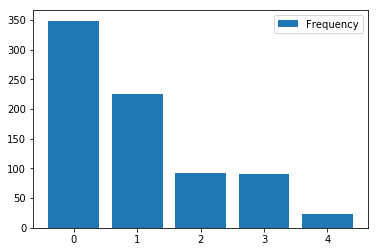

In [107]:
label_count = {}
label = train_df['heart_disease_diagnosis']

for i in range(5):
    label_count[str(i)] = label.loc[label ==i].count()

plt.bar(label_count.keys(), [label_count[str(i)] for i in range(5)], label="Frequency")
leg = plt.legend()
plt.show()

### Age

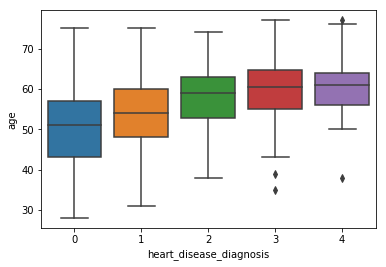

In [108]:
sns.boxplot(x="heart_disease_diagnosis", y="age", data=train_df)
plt.show()

### Sex 

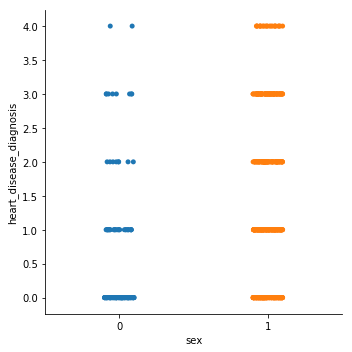

In [109]:
sns.catplot(x="sex", y="heart_disease_diagnosis", data=train_df)
plt.show()

### Chest Pain Type

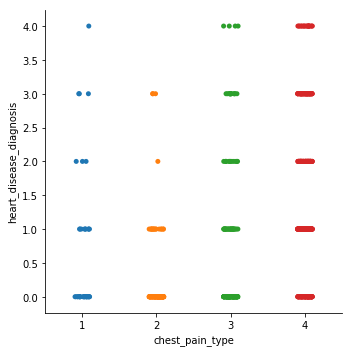

In [110]:
sns.catplot(x="chest_pain_type", y="heart_disease_diagnosis", 
            data=train_df.loc[train_df['chest_pain_type'].astype(str) != '?'])
plt.show()

### Resting Blood Pressure

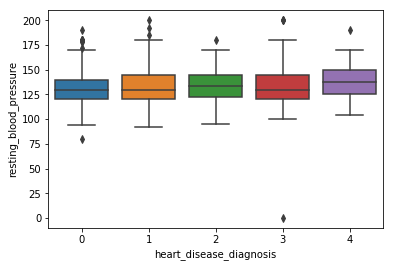

In [111]:
clean_data = train_df.loc[train_df['resting_blood_pressure'].astype(str) != '?' ]
clean_data = clean_data[['resting_blood_pressure', 'heart_disease_diagnosis']].astype(int)
sns.boxplot(x="heart_disease_diagnosis", y="resting_blood_pressure", 
            data=clean_data)
plt.show()

### Serum Cholestrol 

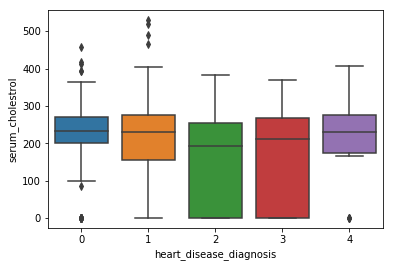

In [135]:
clean_data = train_df.loc[train_df['serum_cholestrol'].astype(str) != '?' ]
clean_data = clean_data[['serum_cholestrol', 'heart_disease_diagnosis']].astype(int)
sns.boxplot(x="heart_disease_diagnosis", y="serum_cholestrol", 
            data=clean_data)
plt.show()

### Resting ECG

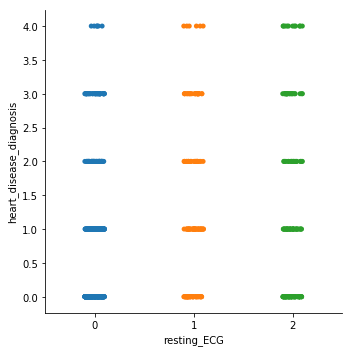

In [136]:
clean_data = train_df.loc[train_df['resting_ECG'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['resting_ECG'].isna()]
clean_data = clean_data[['resting_ECG', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="resting_ECG", y="heart_disease_diagnosis", 
            data=clean_data)
plt.show()

### Max Heart Rate Achieved

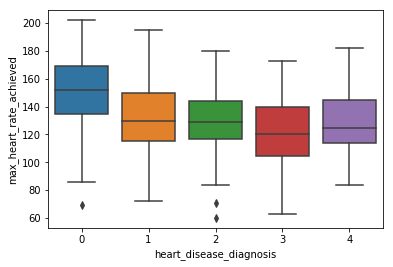

In [137]:
clean_data = train_df.loc[train_df['max_heart_rate_achieved'].astype(str) != '?' ]
clean_data = clean_data[['max_heart_rate_achieved', 'heart_disease_diagnosis']].astype(int)
sns.boxplot(x="heart_disease_diagnosis", y="max_heart_rate_achieved", 
            data=clean_data)
plt.show()

### Exercise Induced Angina

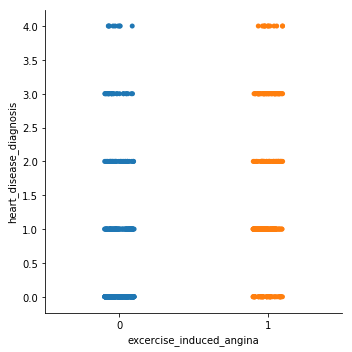

In [139]:
clean_data = train_df.loc[train_df['excercise_induced_angina'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['excercise_induced_angina'].isna()]
clean_data = clean_data[['excercise_induced_angina', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="excercise_induced_angina", y="heart_disease_diagnosis", 
            data=clean_data)
plt.show()

### ST Depression

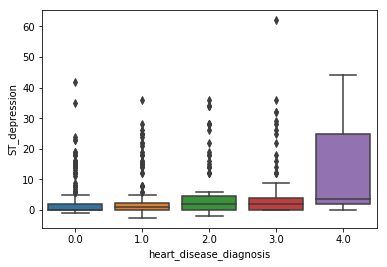

In [140]:
clean_data = train_df.loc[train_df['ST_depression'].astype(str) != '?' ]
clean_data = clean_data[['ST_depression', 'heart_disease_diagnosis']].astype(float)
sns.boxplot(x="heart_disease_diagnosis", y="ST_depression", 
            data=clean_data)
plt.show()

### Peak Exercise ST Segment

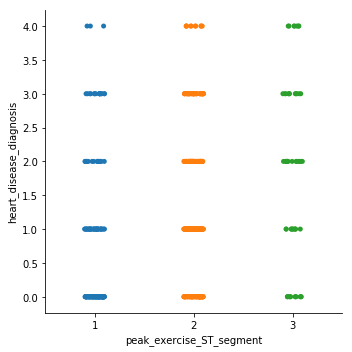

In [142]:
clean_data = train_df.loc[train_df['peak_exercise_ST_segment'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['peak_exercise_ST_segment'].isna()]
clean_data = clean_data[['peak_exercise_ST_segment', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="peak_exercise_ST_segment", y="heart_disease_diagnosis", 
            data=clean_data)
plt.show()

### Number of Major Vessels

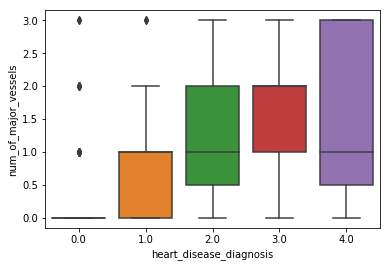

In [146]:
clean_data = train_df.loc[train_df['num_of_major_vessels'].astype(str) != '?' ]
clean_data = clean_data[['num_of_major_vessels', 'heart_disease_diagnosis']].astype(float)
sns.boxplot(x="heart_disease_diagnosis", y="num_of_major_vessels", 
            data=clean_data)
plt.show()

### Thal

In [ ]:
clean_data = train_df.loc[train_df['thal'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['thal'].isna()]
clean_data = clean_data[['thal', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="peak_exercise_ST_segment", y="heart_disease_diagnosis", 
            data=clean_data)
plt.show()